In [1]:
# numerical integration

import scipy.integrate as integrate
import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

print(result)

(1.1178179380783253, 7.866317250224184e-09)


In [2]:
# Optimization (minimization)

# Importing necessary libraries
from scipy.optimize import minimize

# Define the objective function to minimize
def objective_function(x):
    return (x[0] - 2) ** 2 + (x[1] - 3) ** 2

# Initial guess
initial_guess = [0, 0]

# Perform optimization
result = minimize(objective_function, initial_guess, method='BFGS')

# Print the result
print("Optimal solution found at:")
print("x =", result.x)
print("Minimum value =", result.fun)


Optimal solution found at:
x = [1.99999999 2.99999999]
Minimum value = 1.84598775337616e-16


In [3]:
# Linear Algebra

import numpy as np
from scipy import linalg

# Solving a System of Linear Equations
# Consider the equations: 2x + y = 5 and x + 3y = 10
# Represent the coefficients in a matrix A and the constants in a vector B
A = np.array([[2, 1], [1, 3]])
B = np.array([5, 10])
x = linalg.solve(A, B)
print("Solution to the system of linear equations:")
print("x =", x[0])
print("y =", x[1])

# Finding Eigenvalues and Eigenvectors of a Matrix
# Consider a 2x2 matrix
M = np.array([[4, 2], [1, 3]])
eigenvalues, eigenvectors = linalg.eig(M)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Solution to the system of linear equations:
x = 1.0
y = 3.0
Eigenvalues: [5.+0.j 2.+0.j]
Eigenvectors: [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [19]:
# Interpolation

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

###### Linear Interpolation
# Given data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 1, 3, 7, 10])

# Create a linear interpolation function
linear_interp = interpolate.interp1d(x, y)

# Define the points where you want to interpolate
x_interp = np.array([1.5, 2.5, 4.5])
y_interp_linear = linear_interp(x_interp)

###### Cubic Spline Interpolation
# Create a cubic spline interpolation function
cubic_spline = interpolate.CubicSpline(x, y)
# Define the points where you want to interpolate
y_interp_cubic = cubic_spline(x_interp)

print(y_interp_linear)
print(y_interp_cubic)

[1.5 2.  8.5]
[1.39166667 1.575      8.81666667]


In [22]:
#plt.plot(x, y, 'o', x_interp, y_interp_linear, '-', x_interp, y_interp_cubic, '--')
#plt.legend(['data', 'linear', 'cubic'], loc='best')
#plt.show()

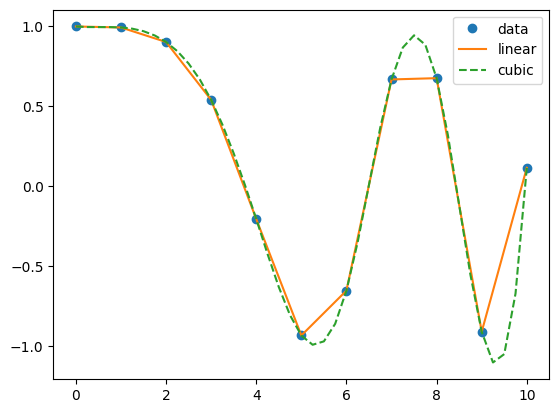

In [24]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

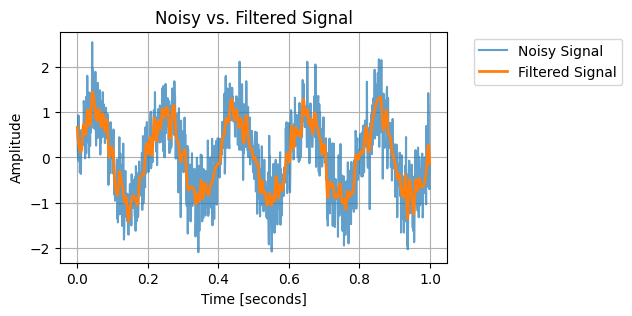

In [35]:
# Signal processing

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Create a noisy signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal_freq = 5  # Frequency of the original signal
noisy_signal = np.sin(2 * np.pi * signal_freq * t) + 0.5 * np.random.normal(size=t.shape)

# Create a low-pass filter
nyquist = 0.5
low_pass_cutoff = 0.1
b, a = signal.butter(4, low_pass_cutoff / nyquist, btype='low')

# Apply the filter to the noisy signal
filtered_signal = signal.filtfilt(b, a, noisy_signal)

# Plot the noisy and filtered signals
def plot_filter():
    plt.figure(figsize=(5, 3))
    plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
    plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
    plt.title('Noisy vs. Filtered Signal')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Amplitude')
    #plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

plot_filter()


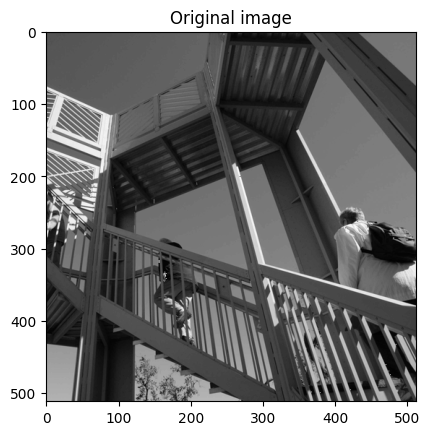

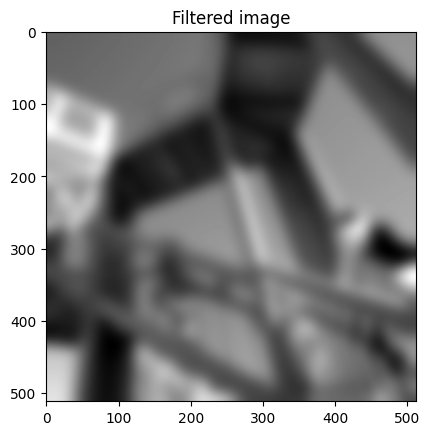

In [32]:
# Signal processing (Gaussian filter)

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, datasets


# Load an example image
image = np.asarray(datasets.ascent(), np.float64)

w = signal.windows.gaussian(51, 10.0)
image_new = signal.sepfir2d(image, w, w)

def plot_image(title, image):
    plt.figure()
    plt.imshow(image)
    plt.gray()
    plt.title(title)
    plt.show()

plot_gf('Original image', image)
plot_gf('Filtered image', image_new)

In [11]:
# ODE: ordinary differential equations

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE
def exponential_decay(y, t, k):
    dydt = -k * y
    return dydt

# Initial condition
y0 = 5.0

# Time points
t = np.linspace(0, 4, 41)

# Decay constant
k = 0.5

# Solve the ODE
y = odeint(exponential_decay, y0, t, args=(k,))

In [12]:
# Statistics

import numpy as np
from scipy import stats

# Sample dataset
data = [3, 5, 7, 9, 5, 3, 5, 8, 2, 7]

# Calculate mean
mean = np.mean(data)

# Calculate median
median = np.median(data)

# Calculate mode
mode = stats.mode(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 5.4
Median: 5.0
Mode: ModeResult(mode=np.int64(5), count=np.int64(3))


In [15]:
# Statistics: PDF of Normal Distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a range of x values
x = np.linspace(-5, 5, 100)

# Define the mean and standard deviation
mean = 0
std_dev = 1

# Calculate the PDF
pdf = norm.pdf(x, mean, std_dev)

#print(pdf)

In [18]:
# Statistics: hypothesis testing

import numpy as np
from scipy import stats

# Sample data for two groups
#group1 = [68, 72, 76, 65, 70]
#group2 = [78, 82, 80, 85, 90]

# Sample data for two groups
group1 = [68, 72, 76, 65, 70]
group2 = [69, 71, 77, 64, 69]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the groups.")

Fail to reject the null hypothesis - There is no significant difference between the groups.
